# **Выражения-генераторы**

При генерации списков, множеств и словарей отрабатывает определённый внутренний генератор, который последовательно генерировал значения при помощи функции next().

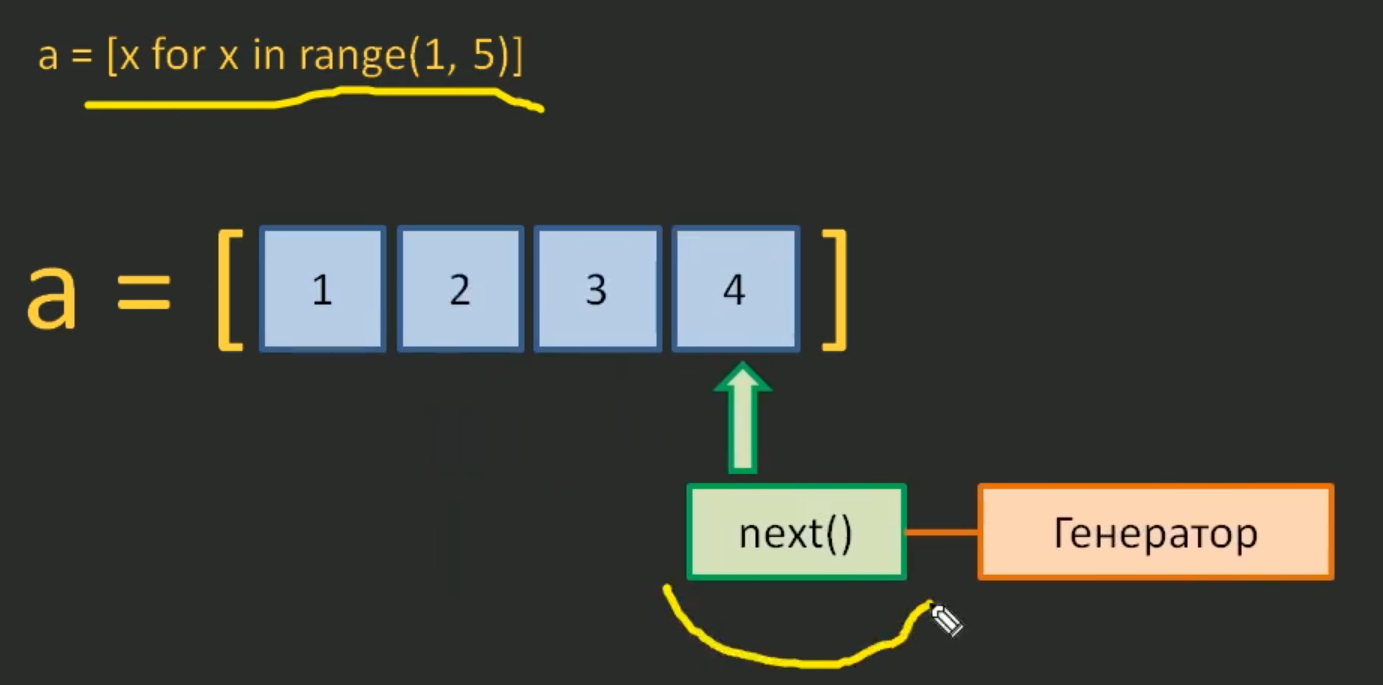

В Python можно определить чистый генератор без привязки к какой-либо коллекции.

Синтаксис (круглые скобки не означают кортеж, генераторов кортежей не существует!):

`(<формирование значения> for <переменная> in <итерируемый объект>)`

Генератор сам по себе является итератором, его можно перебирать функцией next(). Всё происходит так же, как с обычным итератором - когда дойдёт до конца, выдаст ошибку StopIteration. Генератор так же можно перебирать только один раз, если нужно перебрать повторно - надо создавать новый.

Ряд функций (list, set, sum, max, min и др.) принимают в качестве аргумента итераторы/генераторы. Функцией len() пользоваться нельзя.

В отличие от условных списков, генераторы не хранят в памяти сразу все значения, а генерируют их по мере необходимости. Список с очень большим количеством значений создать нельзя - не хватит памяти, а генератор - можно.

Генераторы поддаются распаковке через `*`.

In [ ]:
# создаём чистый генератор
gen = (i ** 2 for i in range(6))
print(gen) # <generator object <genexpr> at 0x000001881D3D6B50>
print(next(gen)) # 0
print(next(gen)) # 1
print(next(gen)) # 4
print(next(gen)) # 9
print(next(gen)) # 16
print(next(gen)) # 25

# пример использования функции с генератором
gen = (i ** 2 for i in range(6))
print(sum(gen)) # 55
print(sum(gen)) # 0, так как нельзя использовать/перебирать генератор повторно

# пример распаковки генератора
lst = [(i ** 2 for i in range(6))]
print(lst) # [<generator object <genexpr> at 0x000001881D431560>]
lst = [*(i ** 2 for i in range(6))]
print(lst) # [0, 1, 4, 9, 16, 25]

# **Функция-генератор. Оператор yield**

Функция-генератор отличается от обычной функции тем, что вместо команды `return` в ней используется `yield`. И если `return` завершает работу функции, то инструкция `yield` лишь приостанавливает её, при этом она возвращает какое-то значение.

При первом явном или неявном вызове метода `next()` выполняется код функции с первой команды до `yield`. При втором `next()` и последующих до конца генератора — код со следующей после `yield` команды и до тех пор, пока `yield` не встретится снова.

`yield` — инструмент очень гибкий. Его можно несколько раз использовать в коде функции-генератора. В этом случае команды `yield` служат разделителями кода: при первом вызове метода `next()` выполняется код до первого `yield`, при следующих вызовах — операторы между `yield`. При этом в генераторной функции необязательно должен быть цикл, все значения генератора и так посчитаются.

In [ ]:
# пример функции-генератора
def get_list():
    for i in [1, 2, 3, 4]:
        yield i

a = get_list()
print(a) # <generator object get_list at 0x000001881D434DC0>
# print(next(a)) # 1
# print(next(a)) # 2
# print(next(a)) # 3
# print(next(a)) # 4

for i in a: # next(a) вызывается неявно
    print(i, end=' ') # 1 2 3 4


# расширенный пример функции-генератора (возвращает простые числа до бесконечности)
def simple_digits():
    i = 2 # определяем стартовое значение
    lst = [] # список делителей
    while True:
        for j in lst: # пробегаемся по списку делителей
            if i % j == 0: # если делитель делится на какое-то число из списка делителей, добавляем число в список делителей и переходим к следующему числу
                lst.append(i)                    
                i += 1
                break
        else:
            yield i # генератор
            lst.append(i) # добавляем число в список делителей и переходим к следующему числу
            i += 1      


f = simple_digits()
for i in range(20):
    print(next(f), end = ' ') # 2 3 5 7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 

# **Функция map**

Функция `map()` возвращает объект map (по сути итератор), применяющий некоторую функцию к элементам итерируемого объекта. Функция может быть любая, принимающая один аргумент и возвращающая некоторое значение (в том числе и определённой пользователем).

К нему можно применять разные функции (`list`, `set`, `sum`, `max`, `min` и др.) по аналогии с обычным генератором.

**В функциях `map`, `filter` и др. используются ССЫЛКИ на функции. Т.е. вызывать их не надо (прописывать без скобочек).**

In [ ]:
b = map(int, ['1', '2', '3', '4', '5'])
# эквивалентно b = (int(x) for x in ['1', '2', '3', '4', '5'])
print(b) # <map object at 0x000001881D689ED0>
print(next(b)) # 1
print(next(b)) # 2

# можно применять строковые методы
cities = ['Москва', 'Астрахань', 'Самара', 'Уфа', 'Смоленск', 'Тверь']
print(list(map(str.upper, cities))) # ['МОСКВА', 'АСТРАХАНЬ', 'САМАРА', 'УФА', 'СМОЛЕНСК', 'ТВЕРЬ']

# пример использования определённой пользователем функции
def symbols(s):
    return list(s.lower())
# аналог - lambda s: list(s.lower()) в качестве функции внутри map

cities = ['Уфа', 'Смоленск', 'Тверь']
print(list(map(symbols, cities))) # [['у', 'ф', 'а'], ['с', 'м', 'о', 'л', 'е', 'н', 'с', 'к'], ['т', 'в', 'е', 'р', 'ь']]

# **Функция filter**

Функция `filter()` позволяет фильтровать (отбирать) элементы итерируемого объекта.

Синтаксис:

`filter(func, *iterables)`

Если применение функции `func` к элементу итерируемого объекта возвращает `True`, `filter` возвращает этот элемент. Если `false` - то не возвращает.

В качестве итерируемого объекта можно передавать и результат другой функции `filter`.

In [ ]:
# пример работы функции filter
lst = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
f = filter(lambda x: x % 2 == 0, lst)
print(f) # <filter object at 0x000001881E004D90>
print(*list(f)) # 2 4 6 8 10

# нахождение простых значений
def is_simple(x):
    d = x - 1
    if d <= 0:
        return False
    
    while d > 1:
        if x % d == 0:
            return False
        d -= 1

    return True

lst = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
f = filter(is_simple, lst)
print(*list(f)) # 2 3 5 7

f1 = filter(lambda x: x % 2 != 0, filter(is_simple, lst))
print(*list(f1)) # 3 5 7

# **Функция zip**

Функция `zip()` в Python создает итератор, который объединяет элементы из нескольких источников данных. Эта функция работает со списками, кортежами, множествами и словарями для создания списков или кортежей, включающих все эти данные.

Синтаксис:

`zip(iter1 [, iter2, iter3])`

Принцип работы:

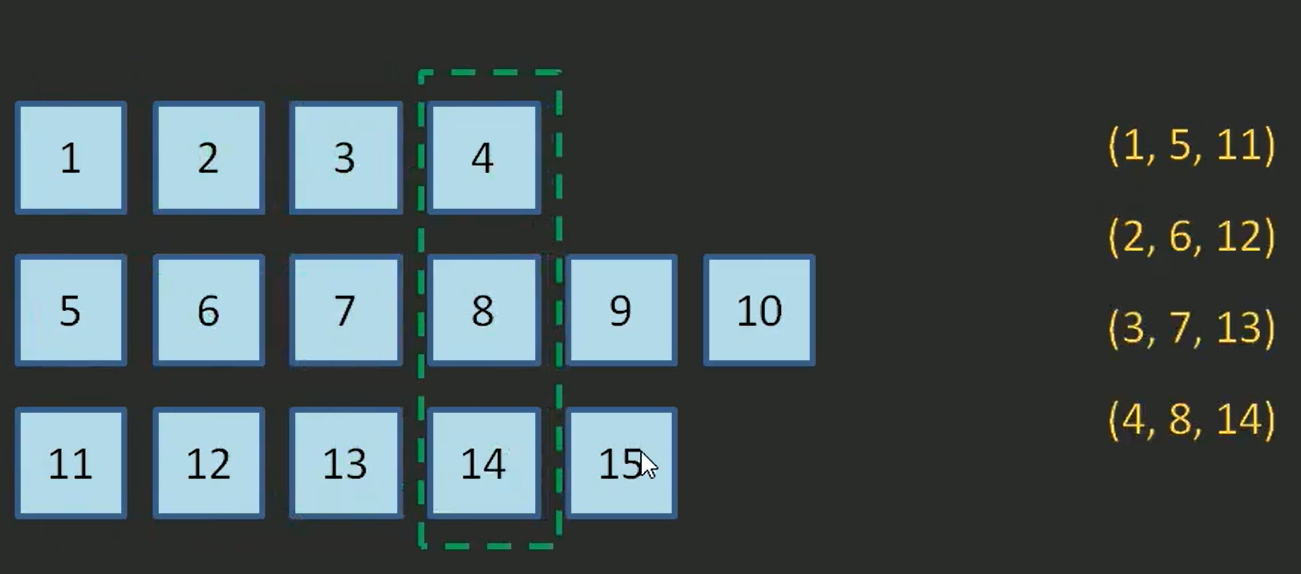

In [ ]:
# пример использования функции zip()
a = [1, 2, 3, 4]
b = [5, 6, 7, 8, 9, 10]
c = 'python'

z = zip(a, b, c)
print(z) # <zip object at 0x000001F2753374C0>
print(tuple(z)) # ((1, 5, 'p'), (2, 6, 'y'), (3, 7, 't'), (4, 8, 'h'))
z1, z2, z3, z4 = zip(a, b, c)
print(z1, z2, z3, z4) # (1, 5, 'p') (2, 6, 'y') (3, 7, 't') (4, 8, 'h')

# любопытная интеракция
z = zip(a, b, c)
z1 = zip(z)
print(*list(z1)) # (1, 2, 3, 4) (5, 6, 7, 8) ('p', 'y', 't', 'h')

# ещё одна любопытная интеракция
x = iter([1, 2, 3, 4, 5, 6, 7, 8, 9])
print(*zip(x, x, x)) # (1, 2, 3) (4, 5, 6) (7, 8, 9)

# **Сортировка с помощью sort и sorted**

`list.sort()`: метод для сортировки элементов списка. Меняет непосредственно сам список. Ничего не возвращает. Если в списке окажется значение, которое не может сравниваться с другими элементами списка, метод вернёт ошибку.

`sorted()`: функция для сортировки итерируемых объектов (списков, кортежей, словарей и т.д.). Возвращает новый отсортированный **список** (!), старую коллекцию не изменяет.

У обоих вариантов сортировки есть параметр `reverse=True/False`, который задаёт сортировку по убыванию или неубыванию (по умолчанию `False` - сортирует по неубыванию).

In [ ]:
# пример работы sort()
lst = [2, 1, 5, 4, 3]
lst.sort()
print(lst) # [1, 2, 3, 4, 5]

# пример работы sorted()
lst = [2, 1, 5, 4, 3]
print(sorted(lst)) # [1, 2, 3, 4, 5]

# пример работы sorted() с кортежем и строкой
lst = (2, 1, 5, 4, 3)
print(sorted(lst)) # [1, 2, 3, 4, 5]
s = 'python'
print(sorted(s)) # ['h', 'n', 'o', 'p', 't', 'y']
# в обоих случаях возвратился список

# сортировка для словаря
d = {'river': "река", 'house': "дом", 'tree': "дерево", 'road': "дорога"}
print(sorted(d)) # ['house', 'river', 'road', 'tree']
print(sorted(d.values())) # ['дерево', 'дом', 'дорога', 'река']
print(sorted(d.items())) # [('house', 'дом'), ('river', 'река'), ('road', 'дорога'), ('tree', 'дерево')]
print(dict(sorted(d.items()))) # {'house': 'дом', 'river': 'река', 'road': 'дорога', 'tree': 'дерево'}

## **Аргумент key для управления сортировкой**

Аргумент key имеется у метода `sort()` и функции `sorted()`. Он позволяет управлять алгоритмом сортировки. В него нужно передать какую-либо функцию, которая принимает на вход одно значение и возвращает одно значение.

Логика работы примера ниже:

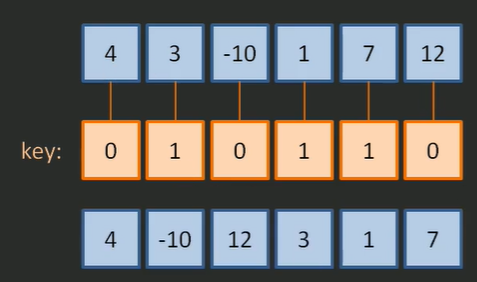

In [ ]:
# пример использования аргумента key для деления на чётные/нечётные
def is_odd(n):
    return n % 2
# аналог lambda x: x % 2

values = [4, 3, -10, 1, 7, 12]
sort_values = sorted(values, key=is_odd)
print(sort_values) # [4, -10, 12, 3, 1, 7]

# расширенный пример с дополнительной сортировкой чисел в группах чётные/нечётные по неубыванию
def key_sort(x):
    return x if x % 2 == 0 else 100 + x

lst = [4, 3, -10, 1, 7, 12]

print(sorted(lst, key=key_sort)) # [-10, 4, 12, 1, 3, 7]

# в примере выше лучше использовать сортировку по кортежам
print(sorted(lst, key=lambda x: (x % 2, x))) # [-10, 4, 12, 1, 3, 7]

# пример сортировки городов по длине названия
lst = ["Москва", "Тверь", "Смоленск", "Псков", "Рязань"]
print(sorted(lst, key=len)) # ['Тверь', 'Псков', 'Москва', 'Рязань', 'Смоленск']
# сортировка по последнему символу названия
print(sorted(lst, key=lambda x: x[-1])) # ['Москва', 'Псков', 'Смоленск', 'Тверь', 'Рязань']
# сортировка по первому символу названия
print(sorted(lst, key=lambda x: x[0])) # ['Москва', 'Псков', 'Рязань', 'Смоленск', 'Тверь']

# пример использования key для сортировки более сложных структур данных
import pprint

books = (
    ("Евгений Онегин", "Пушкин А.С.", 200),
    ("Муму", "Тургенев И.С.", 250),
    ("Мастер и Маргарита", "Булгаков М.А.", 500),
    ("Мертвые души", "Гоголь Н.В.", 190)
)

pprint.pprint(sorted(books, key = lambda x: x[-1]))
# #[('Мертвые души', 'Гоголь Н.В.', 190),
#  ('Евгений Онегин', 'Пушкин А.С.', 200),
#  ('Муму', 'Тургенев И.С.', 250),
#  ('Мастер и Маргарита', 'Булгаков М.А.', 500)]

# **Функция isinstance для проверки типов данных**

Функция `isinstance()` проверяет соответствие объекта определённому типу данных. Возвращает `True`, если объект соответствует указанному типу, в противном случае `False`.

Синтаксис:

`isinstance(объект, тип данных)`

Специфическая интеракция с булевым типом данных - определяет `True` и как `bool`, и как `int` (так как `bool` наследуется от типа `int`). На соответствие `True` булевому типу данных лучше проверять через функцию `type()` (пример).

`isinstance()` отличается от `type()` именно тем, что осуществляет проверку с учётом иерархии объектов.

In [ ]:
# пример использования функции isinstance()
a = 5
print(isinstance(a, int)) # True
print(isinstance(a, float)) # False

# пример проверки булевого значения
a = True
print(isinstance(a, bool)) # True
print(isinstance(a, int)) # True
print(type(a) == bool) # True
print(type(a) == int) # False
# строгая проверка на соответствие одному из нескольких типов данных
print(type(a) in (int, bool, str)) # True

# пример использования isinstance() в качестве аргумента другой функции
data = (4.5, 8.7, True, "книга", 8, 10, -11, [True, False])
print(sum(filter(lambda x: isinstance(x, float), data))) # 13.2

# пример осуществления множественных проверок через isinstance()
a = 5.5
res = isinstance(a, (int, float)) # эквивалентно isinstance(a, int) or isinstance(a, float)
print(res) # True

# **Функции all и any**

Функция `all()` возвращает `True`, если все переданные элементы при приведении к булевому значению равняются `True`, и `False`, если хотя бы один элемент равняется `False`.

Функция `any()` возвращают `True`, если хотя бы один переданный элемент при приведении к булевому значению равняется `True`, и `False`, если все элементы равняются `False`.

In [ ]:
# пример работы функции all()
lst = [1, 2, 'python', [1, 2], {1, 2}, (1, 2)]
print(all(lst)) # True

lst = [1, 2, [], 'abc', {'a': 1, 'b': 2}]
print(all(lst)) # False, так как пустая коллекция при приведении к булевому значению

# пример работы функции any()
lst = [0, False, [], {}, (), '', 1]
print(any(lst)) # True
lst = [0, False, [], {}, (), '']
print(any(lst)) # False